<a href="https://colab.research.google.com/github/negar67/Python/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np #Numpy provides fast mathematical function processing
import matplotlib.pyplot as plt #Machine Learning library to create plots and visualizations
import pandas as pd #Pandas is used for easy indexing and data collection tools
import seaborn as sns #This is a library to do more attractive and in depth data visualization than Matplotlib
from sklearn.model_selection import train_test_split #has replaced "import sklearn.cross_validation as cross_validation"
from sklearn.linear_model import LinearRegression #MachineLearning library used to display
from sklearn.svm import LinearSVC #Support Vector Classification #used to fit the data you provide, returning a "best fit" for regression/classification

In [0]:
#Here we are importing the csv file
#Mydata is the dataframe
Mydata=pd.read_csv("https://raw.githubusercontent.com/TERRENCE2019/DATASETS/master/student_scores.csv")

In [0]:
#This shows entire dataset in rows and columns
Mydata.shape

(25, 2)

In [0]:
#This is the dataframe. head() is used to preview the data
Mydata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [0]:
#This gives some insight into our data
#Count tells that every row is equal in both columns
#Mean tells the average of the values in each column
#Standard deviation is the disparity between each number and the mean
#A low std dev means that most of the numbers are close to the mean
#A high std dev means that the numbers are more spread out
Mydata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


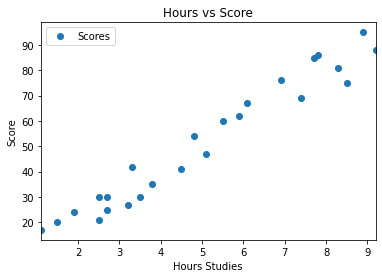

In [0]:
Mydata.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studies')
plt.ylabel('Score')
plt.show()

In [0]:
#We will divide the data into "Attributes" and "Labels"
#Attributes are the independent variable (x axis)
#Labels are the dependent variables whose values are to be predicted (y axis)
#Now we want to predict the percentage score depending upon the hours studies
#iloc gets rows (or columns) at particularpositions in the index
#row selector and column selector
#Even though we have only have 2 columns this comes in handy with data with multiple columns
x = Mydata.iloc[:,0:-1].values #Wes want all the rows ":" and all the columns
y = Mydata.iloc[:, 1].values # we want all the rows ":" and just the second column as our (y axis = dependent variable = score)

In [0]:
#Split the dataset into the training set and test set
#We're splitting the data for training and testing
#75% of it will be for training and 25% of it will be tested for accuracy
#xtrain: this will be your training modue)
#ytrain: as you can imangine2, this will be your target for your first group
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=0, shuffle=True)


In [0]:
#These codes train our algorithm for linear Regression and Machine Learning
reg = LinearRegression()
reg.fit(xtrain, ytrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#We want to know intercept
print(reg.intercept_)

1.9322042531516601


In [0]:
#The one hour more study can increase chances of higher score by 9.94%
print(reg.coef_)

[9.94167834]


In [0]:
#We will use our test data and see how accurately our algorithm predicts the percentage score to make predictions on the test data
yprediction = reg.predict(xtest)

In [0]:
#This shows the actual value of the test scores compared to the predicted values
#Not too bad but could use some tightening up
Mydata2 = pd.DataFrame({'Actual':ytest, 'Predicted':yprediction})

In [0]:
Mydata2

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [0]:
from sklearn import metrics
#The Root Mean Squared Error is 4.5, which is less than 10% of the mean value of the percentage of all teh students (51.48)
#This means that our algorithm did a okay job
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, yprediction)) #the absolute value of the errors
print('Mean Squared Error:', metrics.mean_squared_error(ytest,yprediction)) #Mean Squared Error (MSE) is the mean of the squared errors
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, yprediction))) #Square root of the mean of the squared errors

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805


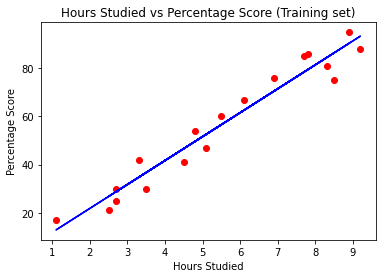

In [0]:
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(xtrain, reg.predict(xtrain), color ='blue')
plt.title('Hours Studied vs Percentage Score (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()